# Project: No-show appointments dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be analysing data regarding medical appointments in Brazil with the focus on the question of whether or not patients show up for their appointment. I will analyse characteristics for patients that show up and how they differ from patients who did not.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- ‘No-show’, ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation.

The questions:
- Does age play a role in no-show ups?
- Does gender play a role?
- Does SMS reminder improves the number of show ups?
- Does waiting time affects patients' attendance?

In [1]:
# importing packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# loading data
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checking the shape of the dataset
df.shape

(110527, 14)

In [4]:
# checking the descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# checking datatypes and if there are any null values (one way of doing it)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# checking duplicates
sum(df.duplicated())

0

### Data Cleaning

In [7]:
# there are no duplicates and no null values to handle
# renaming columns
df.rename(columns = {'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [8]:
# changing data types for dates:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# changing data types to a full date:
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [9]:
# calculating the day difference
df['WaitingTime'] = df["AppointmentDay"] - df["ScheduledDay"]
df["WaitingTime"] = df["WaitingTime"] / np.timedelta64(1, 'D')

In [10]:
# checking the descriptive statistics
df['WaitingTime'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingTime, dtype: float64

In [11]:
# 'removing' options with negative values
df["WaitingTime"] = df["WaitingTime"].abs()

In [12]:
# assigning 0's to patients who showed up and 1's to the ones who did not show up:
df['No_show'].replace({'No':0,'Yes':1},inplace=True)

In [13]:
# keeping patients with age above 0 (removing an outlier):
df = df.query('Age >= 0')

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Does age play a role in no-show ups?

In [14]:
# splitting up the dataset to 2 sets, for patients who showed up and those who did not
df.showed = df.query('No_show == 0')
df.not_showed = df.query('No_show == 1')

In [15]:
# calculating % of how many patients showed/not showed up
appeared = df.showed['Age'].count()
not_appeared = df.not_showed['Age'].count()

app_proportion = appeared / df['Age'].count()
napp_propotion = not_appeared / df['Age'].count()

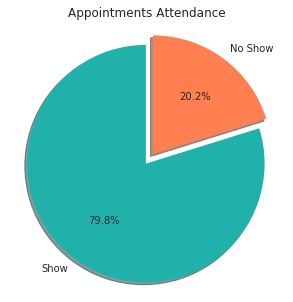

In [16]:
# plotting a pie chart to show proportions of show (~ 80%)/no show(~20%) patients

labels = ['Show', 'No Show']
sizes = [app_proportion, napp_propotion]
colors = ['lightseagreen', 'coral']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Appointments Attendance')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

In [17]:
# checking the mean of patients who showed up
df.showed['Age'].mean()

37.790504154999034

In [18]:
# checking the mean of patients who not showed up
df.not_showed['Age'].mean()

34.317666562121957

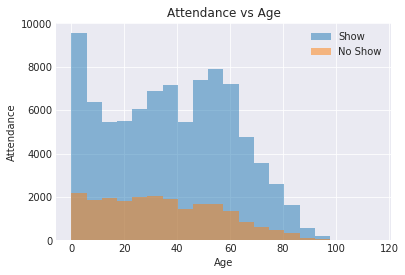

In [19]:
# plotting a histogram in order to investigate trends in age among show/no show patients
# for instance: if there is any certain age after which patients show up more often

df.showed['Age'].hist(alpha=0.5, bins=20, label='Show')
df.not_showed['Age'].hist(alpha=0.5, bins=20, label='No Show')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Attendance')
plt.title('Attendance vs Age');

### Question 2: Does gender play a role in no-show ups?

In [20]:
# splitting up the dataset to genders
female = df.query('Gender == "F"')
male = df.query('Gender == "M"')

In [21]:
# caclulating the mean of show-ups among genders
avg_female = female['No_show'].mean()
avg_male = male['No_show'].mean()

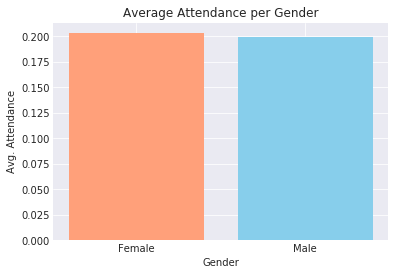

In [22]:
# plotting a bar chart to show the average attendance for female and male patients (both at around 20%)

locations = [1, 2]
heights = [avg_female, avg_male]
labels = ['Female', 'Male']

bar1 = plt.bar(locations, heights, tick_label=labels, color=['lightsalmon', 'skyblue'])
plt.title('Average Attendance per Gender')
plt.xlabel('Gender')
plt.ylabel('Avg. Attendance');

### Question 3: Does SMS reminder improves the number of show ups?

In [23]:
# splitting up the dataset to 2 sets, for patients who received a reminder and those who did not
ngot_sms = df.query('SMS_received == 0')
got_sms = df.query('SMS_received == 1')

In [24]:
# caclulating the mean of show-ups among patients who got a reminder and who did not
no_sms = ngot_sms['No_show'].mean()
sms = got_sms['No_show'].mean()

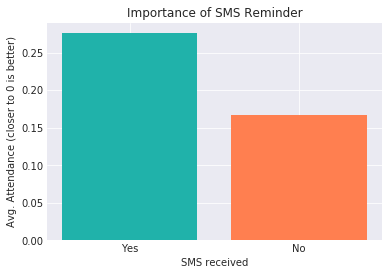

In [25]:
# plotting a bar chart to show the average attendance for those who received/no received the reminder

locations = [1, 2]
heights = [sms, no_sms]
labels = ['Yes', 'No']

bar1 = plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('Importance of SMS Reminder')
plt.xlabel('SMS received')
plt.ylabel('Avg. Attendance (closer to 0 is better)');

In [26]:
# checking the mean for SMS sent for those who showed up and did not 
avg_nb_sms_showed = df.showed['SMS_received'].mean()
avg_nb_sms_not_showed =df.not_showed['SMS_received'].mean()

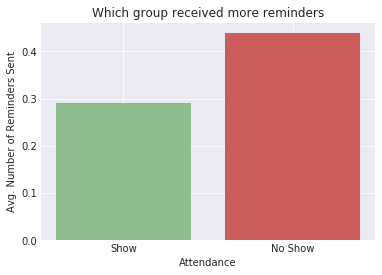

In [27]:
# plotting a bar chart to show the average number of SMS sent to show/no show patients

locations = [1, 2]
heights = [avg_nb_sms_showed, avg_nb_sms_not_showed]
labels = ['Show', 'No Show']

bar1 = plt.bar(locations, heights, tick_label=labels, color=['darkseagreen', 'indianred'])
plt.title('Which group received more reminders')
plt.xlabel('Attendance')
plt.ylabel('Avg. Number of Reminders Sent');

### Question 4: Does waiting time affects patients' attendance?

In [28]:
# calculating the average waiting time for patients who did not show up
df.not_showed['WaitingTime'].mean()

15.832384963484028

In [29]:
# calculating the average waiting time for patients who showed up
df.showed['WaitingTime'].mean()

8.7547586926207668

In [30]:
#removing outliers (100 days of waiting time seem to be reasonable)
df.not_showed = df.not_showed.query('WaitingTime <= 100')
df.showed = df.showed.query('WaitingTime <= 100')

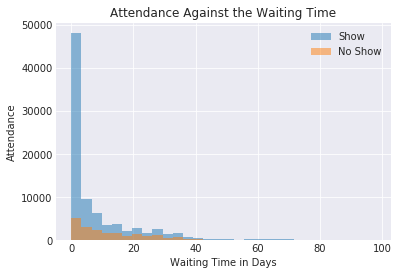

In [31]:
# plotting a histogram in order to investigate trends in the waiting time among show/no show patients
# for instance: if there is any time treshold after which patients do not show up more frequently

df.showed['WaitingTime'].hist(alpha=0.5, bins=30, label='Show')
df.not_showed['WaitingTime'].hist(alpha=0.5, bins=30, label='No Show')
plt.legend()
plt.xlabel('Waiting Time in Days')
plt.ylabel('Attendance')
plt.title('Attendance Against the Waiting Time');

<a id='conclusions'></a>
## Conclusions

Approximately 80% of all patients did show up on the day of the appointments were no-shows. The average attendance for both genders is similar (20% of no shows). Those patients whose appointment happened the same day have the best ratio of show ups. SMS reminder does not improve the average of show up.

#### Limitations:
 - Not enough data to spot trends. The dataset contains appointments scheduled within nearly 6 weeks (between 29/04/2016 and 08/06/2016), some days in a week are missing (possible public holidays in Brazil when appointments were not scheduled at all, even though hospitals run 24/7). For instance we are not able to identify if appointemnts scheduled on weekends ( or Saturdays) are more successful because in our dataset we have only one instance when appointments happen on Saturday.
 - We might be missing some datapoints that might be usefull for analysis and why some certain individuals are more prone to show up or not, like for instance the distance between the patient home and the hospital; the casue of the scheduled appointemnt (seriousness of the issue); employment status (unemployed, full/part time, student).
 - There were no null values and duplicates in the dataset.
 - There were outliers spotted for Age, where the min Age was -1 and the max 115. I keept 115 as it is plausible nowadays. 

#### Findings:
<br>**_Does age play a role in no-show ups?_**
 - Yes, age plays a role in the number of show-ups. Older people (60+) tend to show up more often than younger ones.

<br>**_Does gender play a role?_**
 - No, gender does not play a role in no-show ups.

<br>**_Does SMS reminder improves the number of show ups?_**
 - Those who received reminders have lower average number of show ups by approx 0.1. Moreover less reminders were sent to those who showed up more often<br>It is most probably due to the fact that the most of appointments happened the same day as scheduled day. So there is no need for sending SMS/reminders to those patients.

<br>**_Does waiting time affects patients' attendance?_**
 - Waiting time does affect patients' attendance. Those who don't have to wait or wait 1-2 days show up more often than those who have to wait longer.